# Preparation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# PART 1

## 1. Generate Dataset

In [9]:
# 1. Dataset 2D
np.random.seed(42)
n_points = 100_000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

## 2. Pick Query Point

In [10]:
# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

Exact NN index: [64040 64186 88792]
Exact NN jarak: [0.         0.15797867 0.25332711]
Waktu Exact: 30.4511 ms


## 3. Exact nearest neighbors

In [11]:
# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(8)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")


Annoy NN index: [64040, 64186, 88792]
Annoy NN jarak: [np.float64(0.0), np.float64(0.1579786703429142), np.float64(0.2533271079062769)]
Waktu Annoy: 0.1037 ms


## 4. Visualization

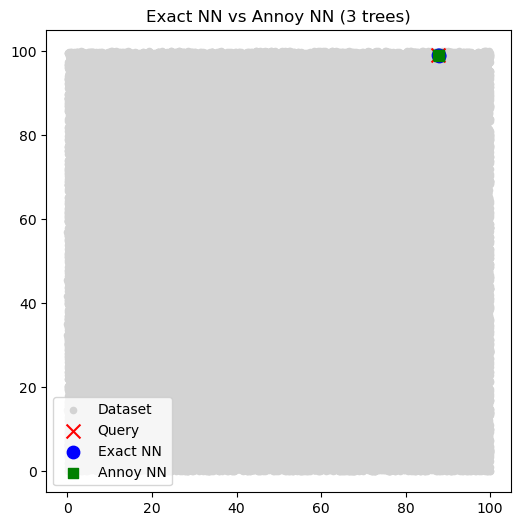

In [12]:
# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

## 5. Summary

| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN          | Waktu komputasi  |
|------------------|------|--------------|-------------------------------------------|----------------------|
| Euclidean        | 3    | 1.000         | [219 898 593], [219 898 770]              | 18.8437 , 1.451     |
| Euclidean        | 8    | 1.000         | [219, 898, 593], [219, 898, 593]                                      | 18.8437 , 0.5882              |
| Euclidean        | 3    | 100.000      | [64040 64186 88792], [64040, 64186, 88792]                                      | 30.4511, 0.1037         |
| Angular          | 3    | 1.000         | ...                                       | ...                  |
| Angular          | 8    | 1.000         | ...                                       | ...                  |
| Angular          | 3    | 100.000      | ...                                       | ...                  |

---

# PART 2

## 1. Generate Dataset

In [ ]:
# ---- 1. Buat dataset mirip Spotify ----
n_tracks = 50_000_000   # 50 juta track
n_features = 20        # contoh: danceability, energy, tempo, dll.

# dataset besar (random untuk simulasi)
X = np.random.rand(n_tracks, n_features).astype(np.float32)

# query track (misalnya lagu baru)
query = np.random.rand(1, n_features).astype(np.float32)

## 2. Exact NN

In [ ]:
# ---- 2. Exact NN (brute force) ----
start = time.time()
distances = euclidean_distances(query, X)[0]   # hitung semua jarak
exact_idx = np.argsort(distances)[:5]          # ambil 5 terdekat
exact_time = time.time() - start

print("Exact NN result:", exact_idx)
print("Exact NN time:", round(exact_time, 3), "seconds")

## 3. Approx NN with Annoy

In [ ]:
# ---- 3. Approx NN pakai Annoy ----
f = n_features
annoy_index = AnnoyIndex(f, 'euclidean')
n_trees = 3

# build index
for i in range(n_tracks):
    annoy_index.add_item(i, X[i])
annoy_index.build(n_trees)

start = time.time()
annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)  # ambil 5 lagu yang mirip
annoy_time = time.time() - start

print("Annoy result:", annoy_idx)
print("Annoy time:", round(annoy_time, 3), "seconds")

## 5. Summary

| Distance Metrics | Tree | Jumlah data | Hasil Index terdekat ENN vs ANN          | Waktu komputasi  |
|------------------|------|--------------|-------------------------------------------|----------------------|
| Euclidean        | 3    | 1.000         | ...              | ...     |
| Angular          | 3    | 100.000      | ...                                       | ...                  |